PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng

In [2]:
df=pd.read_csv('/content/titanic_disaster.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


2. Thống kê dữ liệu thiếu trên tập dữ liệu kết hợp:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


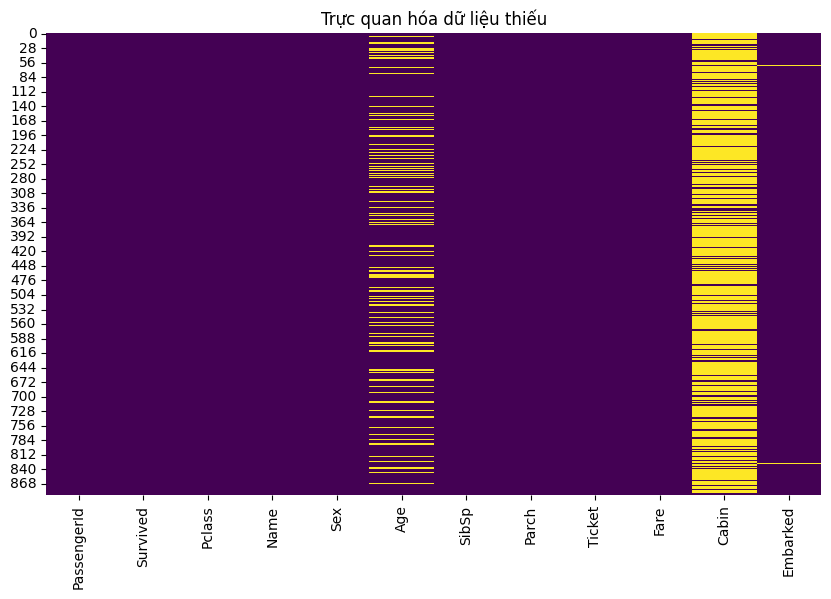


Nhận xét về tình trạng thiếu dữ liệu:
- Age: Có một lượng đáng kể dữ liệu thiếu.
- Cabin: Phần lớn dữ liệu bị thiếu.
- Embarked: Có một vài dữ liệu bị thiếu.


In [4]:
print("\n2. Thống kê dữ liệu thiếu trên tập dữ liệu kết hợp:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Trực quan hóa dữ liệu thiếu')
plt.show()
print("\nNhận xét về tình trạng thiếu dữ liệu:")
print("- Age: Có một lượng đáng kể dữ liệu thiếu.")
print("- Cabin: Phần lớn dữ liệu bị thiếu.")
print("- Embarked: Có một vài dữ liệu bị thiếu.")

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name

In [5]:
print("\n3. Xử lý cột 'Name': tách thành 'firstName' và 'secondName'")
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)
df.drop('Name', axis=1, inplace=True)
print(df[['firstName', 'secondName']].head())


3. Xử lý cột 'Name': tách thành 'firstName' và 'secondName'
   firstName                                   secondName
0     Braund                              Mr. Owen Harris
1    Cumings   Mrs. John Bradley (Florence Briggs Thayer)
2  Heikkinen                                  Miss. Laina
3   Futrelle           Mrs. Jacques Heath (Lily May Peel)
4      Allen                            Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [6]:
print("\n4. Rút gọn dữ liệu cột 'Sex'")
df['Sex'].replace({'male': 'M', 'female': 'F'}, inplace=True)
print(df['Sex'].head())


4. Rút gọn dữ liệu cột 'Sex'
0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object


<ipython-input-6-98e993739b1a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'male': 'M', 'female': 'F'}, inplace=True)


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

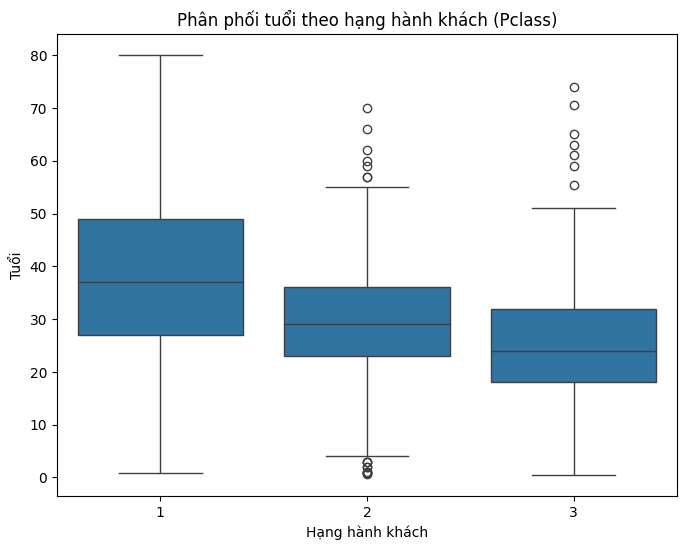


Nhận xét về tuổi trung bình giữa các nhóm hành khách:
- Có sự khác biệt về độ tuổi trung bình giữa các hạng hành khách.
- Hạng 1 có xu hướng có hành khách lớn tuổi hơn so với hạng 2 và 3.
- Hạng 3 có phân phối tuổi trẻ hơn.
- Quyết định: Thay thế giá trị thiếu ở cột 'Age' bằng giá trị trung bình tuổi theo từng hạng hành khách (Pclass) là phù hợp hơn so với việc dùng giá trị trung bình của toàn bộ hành khách, vì có sự khác biệt rõ rệt giữa các nhóm.

Bảng thống kê số lượng giá trị thiếu cột 'Age' sau khi xử lý:
0


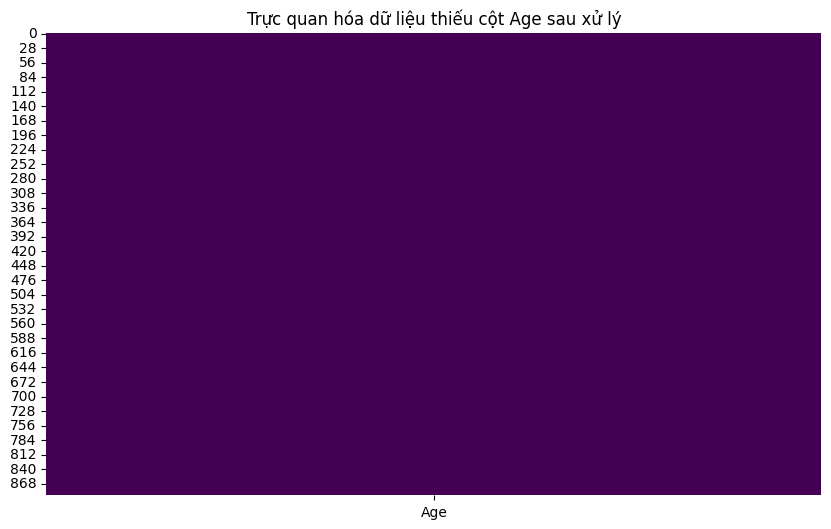

In [7]:
# a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Phân phối tuổi theo hạng hành khách (Pclass)')
plt.xlabel('Hạng hành khách')
plt.ylabel('Tuổi')
plt.show()

print("\nNhận xét về tuổi trung bình giữa các nhóm hành khách:")
print("- Có sự khác biệt về độ tuổi trung bình giữa các hạng hành khách.")
print("- Hạng 1 có xu hướng có hành khách lớn tuổi hơn so với hạng 2 và 3.")
print("- Hạng 3 có phân phối tuổi trẻ hơn.")
print("- Quyết định: Thay thế giá trị thiếu ở cột 'Age' bằng giá trị trung bình tuổi theo từng hạng hành khách (Pclass) là phù hợp hơn so với việc dùng giá trị trung bình của toàn bộ hành khách, vì có sự khác biệt rõ rệt giữa các nhóm.")

# b. Tiến hành thay thế giá trị Age bị thiếu.
df['Age'] =df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Hiển thị kết quả dạng bảng
print("\nBảng thống kê số lượng giá trị thiếu cột 'Age' sau khi xử lý:")
print(df['Age'].isnull().sum())

# Trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age']].isnull(), cbar=False, cmap='viridis')
plt.title('Trực quan hóa dữ liệu thiếu cột Age sau xử lý')
plt.show()

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [8]:
print("\n6. Xây dựng biến số 'Agegroup'")
bins = [0, 12, 18, 60, np.inf]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df[['Age', 'Agegroup']].head(15))


6. Xây dựng biến số 'Agegroup'
         Age Agegroup
0   22.00000    Adult
1   38.00000    Adult
2   26.00000    Adult
3   35.00000    Adult
4   35.00000    Adult
5   25.14062    Adult
6   54.00000    Adult
7    2.00000      Kid
8   27.00000    Adult
9   14.00000     Teen
10   4.00000      Kid
11  58.00000    Adult
12  20.00000    Adult
13  39.00000    Adult
14  14.00000     Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [12]:
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df['namePrefix'] = df['secondName'].apply(extract_title)
print(df['namePrefix'].value_counts())

namePrefix
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [13]:
print("\n8. Tạo đặc trưng 'familySize'")
df['familySize'] = 1 + df['SibSp'] + df['Parch']
print(df[['SibSp', 'Parch', 'familySize']].head())


8. Tạo đặc trưng 'familySize'
   SibSp  Parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [14]:
print("\n9. Tạo đặc trưng 'Alone'")
df['Alone'] = np.where(df['familySize'] == 1, 1, 0)
print(df[['familySize', 'Alone']].head())


9. Tạo đặc trưng 'Alone'
   familySize  Alone
0           2      0
1           2      0
2           1      1
3           2      0
4           1      1


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
thì thay thế bằng “Unknown”

In [15]:
print("\n10. Tạo đặc trưng 'typeCabin'")
df['typeCabin'] = df['Cabin'].str[0].fillna('Unknown')
print(df['typeCabin'].value_counts())


10. Tạo đặc trưng 'typeCabin'
typeCabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.


In [16]:
train_identifiers = df['PassengerId']
test_identifiers = df['PassengerId']

# Tìm các PassengerId xuất hiện trong cả hai tập dữ liệu (nếu có)
intersection = set(train_identifiers) & set(test_identifiers)

if intersection:
    print(f"\nCảnh báo: Tìm thấy {len(intersection)} PassengerId trùng lặp giữa train và test.")
    combined_df = df[~df['PassengerId'].isin(intersection)]
else:
    print("\nKhông tìm thấy PassengerId trùng lặp giữa train và test.")

# Tách lại thành train và test (nếu cần cho EDA riêng biệt)
train_processed_df = combined_df[combined_df['PassengerId'].isin(train_identifiers)]
test_processed_df = combined_df[combined_df['PassengerId'].isin(test_identifiers)]

# Gán lại Survived vào train_processed_df
train_processed_df['Survived'] = df['Survived']

print("\nKích thước tập dữ liệu huấn luyện sau xử lý:", train_processed_df.shape)
print("Kích thước tập dữ liệu kiểm tra sau xử lý:", test_processed_df.shape)


Cảnh báo: Tìm thấy 891 PassengerId trùng lặp giữa train và test.

Kích thước tập dữ liệu huấn luyện sau xử lý: (891, 18)
Kích thước tập dữ liệu kiểm tra sau xử lý: (0, 18)


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

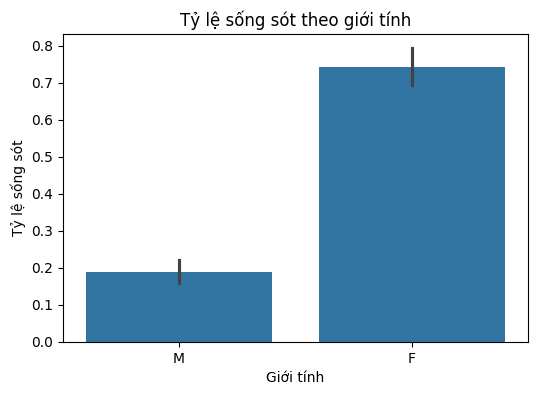


Nhận xét: Phụ nữ có tỷ lệ sống sót cao hơn đáng kể so với nam giới.


In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Tỷ lệ sống sót theo giới tính')
plt.ylabel('Tỷ lệ sống sót')
plt.xlabel('Giới tính')
plt.show()
print("\nNhận xét: Phụ nữ có tỷ lệ sống sót cao hơn đáng kể so với nam giới.")

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

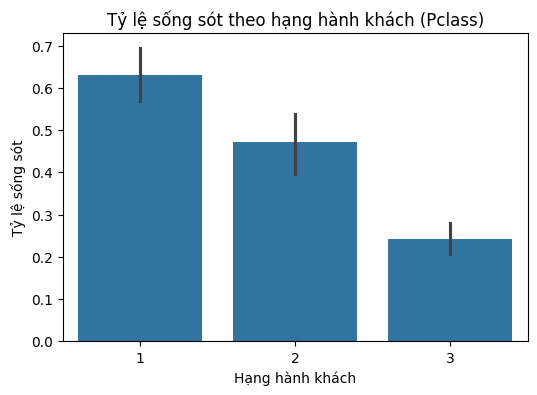


Nhận xét: Hành khách ở hạng 1 có tỷ lệ sống sót cao nhất, tiếp theo là hạng 2 và cuối cùng là hạng 3 có tỷ lệ sống sót thấp nhất.


In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tỷ lệ sống sót theo hạng hành khách (Pclass)')
plt.ylabel('Tỷ lệ sống sót')
plt.xlabel('Hạng hành khách')
plt.show()
print("\nNhận xét: Hành khách ở hạng 1 có tỷ lệ sống sót cao nhất, tiếp theo là hạng 2 và cuối cùng là hạng 3 có tỷ lệ sống sót thấp nhất.")

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

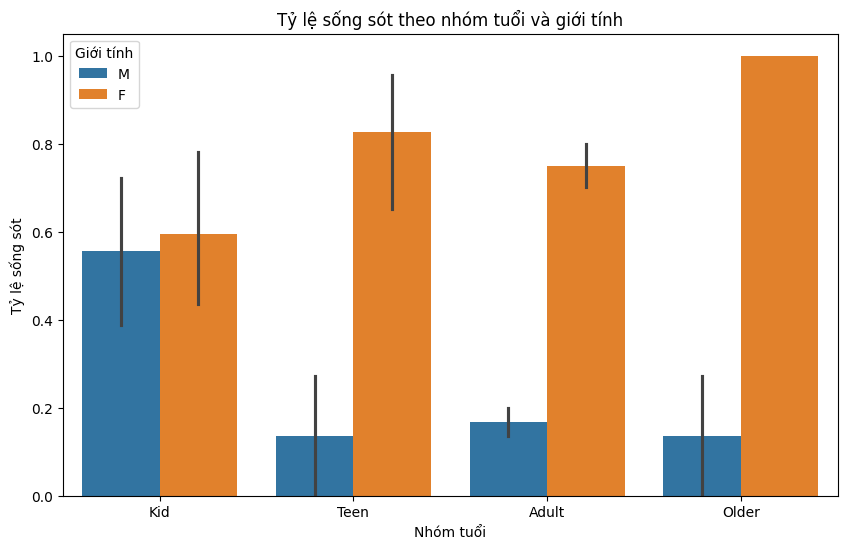


Nhận xét: Trẻ em (Kid) có tỷ lệ sống sót cao, đặc biệt là trẻ em nữ. Phụ nữ trưởng thành (Adult) cũng có tỷ lệ sống sót cao. Nam giới ở mọi nhóm tuổi có tỷ lệ sống sót thấp hơn đáng kể.


In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Agegroup', y='Survived', hue='Sex', data=df)
plt.title('Tỷ lệ sống sót theo nhóm tuổi và giới tính')
plt.ylabel('Tỷ lệ sống sót')
plt.xlabel('Nhóm tuổi')
plt.legend(title='Giới tính')
plt.show()
print("\nNhận xét: Trẻ em (Kid) có tỷ lệ sống sót cao, đặc biệt là trẻ em nữ. Phụ nữ trưởng thành (Adult) cũng có tỷ lệ sống sót cao. Nam giới ở mọi nhóm tuổi có tỷ lệ sống sót thấp hơn đáng kể.")

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

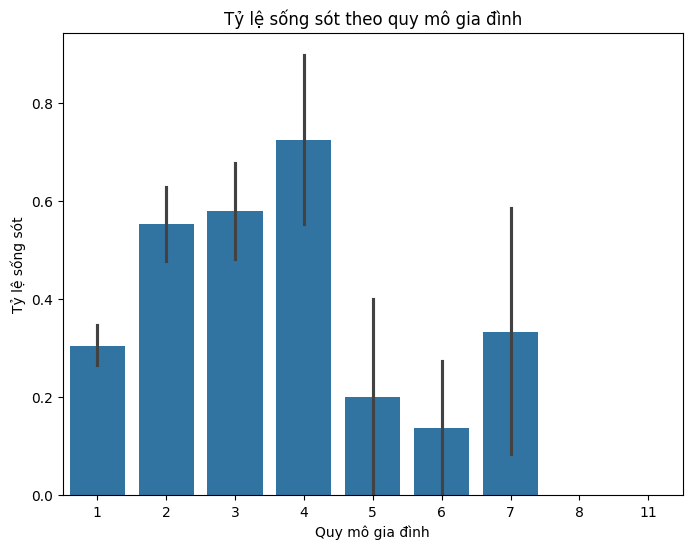


Nhận xét: Hành khách đi một mình (familySize = 1) có tỷ lệ sống sót thấp hơn so với những người đi theo nhóm nhỏ (2-4 người). Quy mô gia đình quá lớn có thể làm giảm tỷ lệ sống sót.


In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='familySize', y='Survived', data=df)
plt.title('Tỷ lệ sống sót theo quy mô gia đình')
plt.ylabel('Tỷ lệ sống sót')
plt.xlabel('Quy mô gia đình')
plt.show()
print("\nNhận xét: Hành khách đi một mình (familySize = 1) có tỷ lệ sống sót thấp hơn so với những người đi theo nhóm nhỏ (2-4 người). Quy mô gia đình quá lớn có thể làm giảm tỷ lệ sống sót.")

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

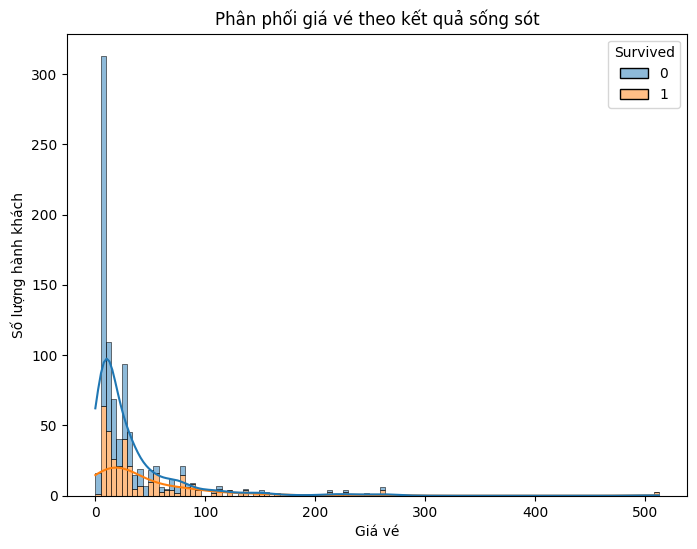


Nhận xét: Hành khách trả vé cao hơn có xu hướng có tỷ lệ sống sót cao hơn. Điều này có thể liên quan đến hạng vé.


In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Phân phối giá vé theo kết quả sống sót')
plt.xlabel('Giá vé')
plt.ylabel('Số lượng hành khách')
plt.show()
print("\nNhận xét: Hành khách trả vé cao hơn có xu hướng có tỷ lệ sống sót cao hơn. Điều này có thể liên quan đến hạng vé.")


17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và
cảng sẽ cập bến.

AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

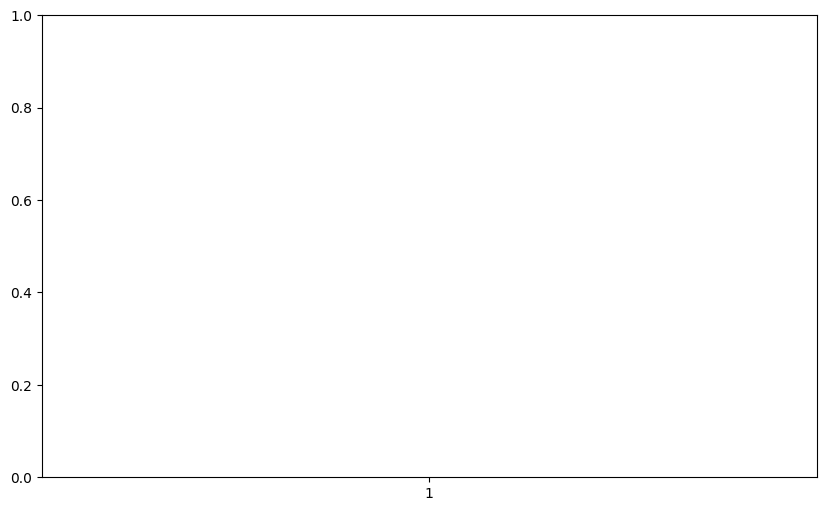

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', col='Embarked')
plt.suptitle('Số lượng sống sót và thiệt mạng theo Pclass và Embarked', y=1.02)
plt.show()
print("\nNhận xét:")
print("- Ở cả ba cảng Embarked, hành khách hạng 3 có số lượng thiệt mạng cao nhất.")
print("- Hành khách hạng 1 có tỷ lệ sống sót cao hơn ở cảng C và S.")
print("- Cảng S có số lượng hành khách lớn nhất.")